# Import packages and load Data

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [264]:
# 'skus' table
skus = pd.read_csv('Jd_com_data/JD_sku_data.csv')
# 'users' table
users = pd.read_csv('Jd_com_data/JD_user_data.csv')
# 'clicks' table
clicks = pd.read_csv('Jd_com_data/JD_click_data.csv')
# 'orders' table
orders = pd.read_csv('Jd_com_data/JD_order_data.csv')
# 'delivery' table
delivery = pd.read_csv('Jd_com_data/JD_delivery_data.csv')
# 'inventory' table
inventory = pd.read_csv('Jd_com_data/JD_inventory_data.csv')
# 'network' table
network = pd.read_csv('Jd_com_data/JD_network_data.csv')

## skus

In [3]:
skus.shape

(31868, 7)

In [4]:
skus.head()

,sku_ID,type,brand_ID,attribute1,attribute2,activate_date,deactivate_date
0,a234e08c57,1,c3ab4bf4d9,3.0,60.0,NaN,NaN
1,6449e1fd87,1,1d8b4b4c63,2.0,50.0,NaN,NaN
2,09b70fcd83,2,eb7d2a675a,3.0,70.0,NaN,NaN
3,acad9fed04,2,9b0d3a5fc6,3.0,70.0,NaN,NaN
4,2fa77e3b4d,2,b681299668,-,-,NaN,NaN


In [9]:
len(skus['sku_ID'].unique()),len(skus['brand_ID'].unique())

(31867, 1890)

In [13]:
skus[skus['sku_ID'].duplicated(keep=False)]

,sku_ID,type,brand_ID,attribute1,attribute2,activate_date,deactivate_date
12905,de9ed6156d,1,7ce2073bf4,3.0,60.0,NaN,NaN
12906,de9ed6156d,1,7ce2073bf4,3.0,50.0,NaN,NaN


## orders

In [63]:
orders.shape

(549989, 17)

In [25]:
orders.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,2,-,89.0,79.0,0.0,10.0,0.0,0.0,0,4,28
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0,28,28
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0,4,28
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16


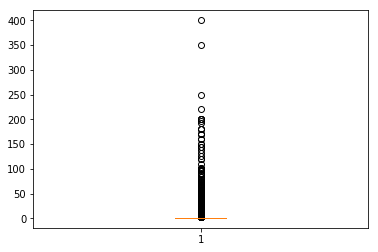

In [7]:
plt.boxplot(orders['quantity'])
plt.show()

In [15]:
orders['quantity'].value_counts()

1      478097
2       56828
3        8875
4        2855
5        1338
6         464
7         255
10        243
9         185
8         140
11        121
24         72
30         68
20         61
12         54
50         37
15         24
13         21
16         20
14         15
18         14
23         13
26         12
17         11
40         11
36          9
25          9
21          8
22          7
19          7
        ...  
33          1
34          1
250         1
220         1
196         1
192         1
145         1
144         1
139         1
132         1
126         1
110         1
98          1
92          1
89          1
84          1
78          1
74          1
73          1
72          1
65          1
60          1
57          1
350         1
46          1
45          1
44          1
42          1
41          1
49          1
Name: quantity, Length: 89, dtype: int64

In [65]:
orders['quantity'].describe()

count    549989.000000
mean          1.216670
std           1.844589
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         400.000000
Name: quantity, dtype: float64

### 非gift数量

In [84]:
orders[orders['gift_item']==1].shape

(94606, 17)

In [5]:
# only consider orders whose quantity equal to 1 and are not gift

orders1 = orders[(orders['quantity']==1) & (orders['gift_item']==0)].copy()

In [87]:
orders1.shape

(399626, 17)

In [91]:
orders['order_ID'].value_counts()[:20]

f9bc89251f    39
ab3619b901    18
a362b61198    15
27d131f91a    15
f0448f9506    14
098115e76c    14
aeaa7ff229    14
ccb91cc6dc    14
f5430c4f62    14
cebb09c0f0    12
84afadc522    12
0556a794df    12
b1066f591e    12
cfed2552df    12
d92a9c9e61    12
5e21e84c4d    12
09f7af0b7a    12
182003dc67    12
a69a262881    12
09359ee255    12
Name: order_ID, dtype: int64

In [90]:
orders1['order_ID'].value_counts()[:20]

857617210f    8
f229140ef0    8
21a46e2dfb    7
b2b1d5463d    7
3ae4132268    6
06a4a6916b    6
40a6299d07    5
aeaa7ff229    5
9e8304b29f    5
83414204e2    5
02e05f2599    5
098115e76c    5
b64ce2d6bd    5
4e80755244    5
f0448f9506    5
f5430c4f62    5
0074ef15ca    5
45aed68c88    5
d37b85a371    5
f172572d29    5
Name: order_ID, dtype: int64

Conclusion:

* 如果同一个user有很多order，那么大部分order都是gift

### 从小商店user入手

In [6]:
# enterprise user
enterpriseUser = users[users["user_level"]==10]['user_ID']

In [26]:
orders1[orders1['user_ID'].isin(enterpriseUser)].shape[0]/orders1.shape[0]

0.011828559703322607

* 小商店user的order量占总量的1.18%

In [98]:
orders1[orders1['user_ID'].isin(enterpriseUser)]['user_ID'].value_counts()

2d25359f9b    552
c1c8327987    501
1a75247e23    154
7ea01030cb    151
bd2cea0899    146
             ... 
10184dc33a      1
c99f5fc246      1
9b3a86f650      1
bd711bf5c7      1
016b2b3f13      1
Name: user_ID, Length: 730, dtype: int64

**以order量最大的商店user为例**

In [7]:
eg = orders1[orders1['user_ID']=='2d25359f9b'].copy()

In [20]:
eg['sku_ID'].value_counts()

38d636d2a6    116
81e57cbc50    106
c56544784c     91
8dc4a01dec     66
7f947c0055     54
589c2b865b     47
4b65db43ac     42
915cd3c4c0     30
Name: sku_ID, dtype: int64

In [27]:
8/len(orders1["sku_ID"].unique())

0.0009262475396549728

In [35]:
# 8个占type=1的比例
8/sum(orders1["sku_ID"].isin(skus[skus['type']==1]["sku_ID"]))

0.0037635192668664472

In [23]:
orders1[orders1['sku_ID'].isin(eg['sku_ID'])].shape[0]/orders1.shape[0]

0.07574332000420393

In [21]:
skus[skus['sku_ID'].isin(eg['sku_ID'].unique())]

,sku_ID,type,brand_ID,attribute1,attribute2,activate_date,deactivate_date
111,c56544784c,1,99d41501ff,3.0,100.0,NaN,NaN
160,7f947c0055,1,a2ff0f7b48,3.0,100.0,NaN,NaN
256,8dc4a01dec,1,43999af013,3.0,100.0,NaN,NaN
1988,81e57cbc50,1,99d41501ff,4.0,100.0,NaN,NaN
2916,38d636d2a6,1,204dbedf50,3.0,100.0,NaN,NaN
3391,4b65db43ac,1,43999af013,3.0,100.0,NaN,NaN
4863,915cd3c4c0,1,fbee78d4ae,2.0,-,NaN,NaN
5075,589c2b865b,1,9b0d3a5fc6,3.0,60.0,NaN,NaN


**Conclusion**

* user_ID = "2d25359f9b" 的全部552个order只来自8个sku_ID
* 8个sku_ID只占sku_ID总量的0.09%， 但这8个sku_ID的order量占总量的7.58%
* 这8个都是 type=1（京东自营）的，事实上超过53%的order都是买的京东自营，虽然京东自营的sku_ID只占3.6%

### 以这8个sku为set进行分析

In [8]:
skuSet = eg['sku_ID'].unique()

In [9]:
skuSet

array(['81e57cbc50', '38d636d2a6', '589c2b865b', '8dc4a01dec',
       '7f947c0055', 'c56544784c', '4b65db43ac', '915cd3c4c0'],
      dtype=object)

**分析clicks数据，看这8个sku是否经常被比较**

In [44]:
clicks.shape

(20214515, 4)

In [10]:
clk = clicks[clicks['sku_ID'].isin(skuSet)].copy()
clk.reset_index(inplace=True,drop=True)

In [11]:
clk.shape

(1345435, 4)

In [76]:
clk.shape[0]/clicks.shape[0]

0.06655786695847019

* 这8个sku的clicks量占总体的6.66%，比较大

In [77]:
clk['request_time'] = pd.to_datetime(clk['request_time'])
clk = clk.groupby('user_ID',group_keys=False).apply(lambda x: x.sort_values('request_time'))
clk.reset_index(inplace=True,drop=True)

In [12]:
# clk.to_csv("clk.csv")
clk = pd.read_csv("clk.csv",index_col=0)
clk['request_time'] = pd.to_datetime(clk['request_time'])

C:\Users\ISETYU\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [13]:
clk

,sku_ID,user_ID,request_time,channel
0,8dc4a01dec,-,2018-03-01 00:00:00,wechat
1,38d636d2a6,-,2018-03-01 00:05:45,mobile
2,c56544784c,-,2018-03-01 00:06:57,mobile
3,81e57cbc50,-,2018-03-01 00:08:03,others
4,81e57cbc50,-,2018-03-01 00:08:03,others
...,...,...,...,...
1345430,8dc4a01dec,ffff1c176b,2018-03-27 01:39:10,app
1345431,8dc4a01dec,ffff1c176b,2018-03-27 01:41:09,app
1345432,589c2b865b,ffff34c273,2018-03-10 10:26:19,app
1345433,7f947c0055,ffffcae38e,2018-03-17 21:07:20,app


In [14]:
clk = clk[~(clk['user_ID']=='-')]
clk.reset_index(inplace=True,drop=True)

In [15]:
clk.shape

(1252127, 4)

In [16]:
skuSet

array(['81e57cbc50', '38d636d2a6', '589c2b865b', '8dc4a01dec',
       '7f947c0055', 'c56544784c', '4b65db43ac', '915cd3c4c0'],
      dtype=object)

In [17]:
clk['sku_ID'].value_counts()

8dc4a01dec    372269
38d636d2a6    216018
81e57cbc50    149723
7f947c0055    135548
589c2b865b    131623
4b65db43ac    122771
c56544784c     69488
915cd3c4c0     54687
Name: sku_ID, dtype: int64

In [18]:
clk

,sku_ID,user_ID,request_time,channel
0,81e57cbc50,00009ca77d,2018-03-09 22:48:11,app
1,38d636d2a6,0000bacc15,2018-03-24 00:00:44,app
2,589c2b865b,0000dce472,2018-03-18 10:43:36,app
3,7f947c0055,000128ad21,2018-03-29 01:47:58,app
4,7f947c0055,000128ad21,2018-03-29 13:37:09,app
...,...,...,...,...
1252122,8dc4a01dec,ffff1c176b,2018-03-27 01:39:10,app
1252123,8dc4a01dec,ffff1c176b,2018-03-27 01:41:09,app
1252124,589c2b865b,ffff34c273,2018-03-10 10:26:19,app
1252125,7f947c0055,ffffcae38e,2018-03-17 21:07:20,app


In [19]:
clicks.shape

(20214515, 4)

In [20]:
clickTidy = clicks[~(clicks['user_ID']=='-')]

In [21]:
clickTidy.shape

(17906095, 4)

In [22]:
clickTidy

,sku_ID,user_ID,request_time,channel
0,a234e08c57,4c3d6d10c2,2018-03-01 23:57:53,wechat
2,09b70fcd83,2791ec4485,2018-03-01 22:10:51,wechat
3,09b70fcd83,eb0718c1c9,2018-03-01 16:34:08,wechat
4,09b70fcd83,59f84cf342,2018-03-01 22:20:35,wechat
5,09b70fcd83,59f84cf342,2018-03-01 22:20:01,wechat
...,...,...,...,...
20214491,904fbf8b97,654cdf01f2,2018-03-31 08:41:55,others
20214496,5f58bfd286,904ede5908,2018-03-31 21:59:17,others
20214498,5f58bfd286,cd789954ed,2018-03-31 07:35:05,others
20214505,019dedb453,9b1fde91de,2018-03-31 07:07:26,others


In [24]:
users.head()

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1


In [32]:
singleCustomers = users[~(users['user_level']==10)]['user_ID'].values
orderSingle = orders1[orders1['user_ID'].isin(singleCustomers)].copy()

In [35]:
orderSingle.shape

(394899, 17)

In [34]:
len(orderSingle['user_ID'].unique())

357736

* 394899个order由357736个user_ID完成，所以每个普通user在3月只买了一次

In [39]:
# def search(x,sku1,sku2):
#     count = 0
#     uptime = (x[x['sku_ID']==sku1]['request_time']+dt.timedelta(hours=10,minutes=0)).values
#     for up in uptime:
#         if sku2 in x[x['request_time']<=up]['sku_ID'].values:
#             count+=1
#     return count
# def freq(sku1,sku2,df):
#     return df.groupby('user_ID').apply(lambda x: search(x,sku1,sku2)).sum()

In [49]:
clkSingle = clk[clk['user_ID'].isin(singleCustomers)].copy()

In [50]:
clkSingle.shape

(457832, 4)

In [59]:
chart = clkSingle.groupby('user_ID').count()
chart1 = chart[chart['sku_ID']>1]

In [76]:
clickSet = clkSingle[clkSingle['user_ID']==user]['sku_ID'].unique()

In [81]:
users = []
for user in chart1.index:
    clickSet = clkSingle[clkSingle['user_ID']==user]['sku_ID'].unique()
    num = len(clickSet)
    if num>1:
        users.append((user,num,clickSet))

In [107]:
df = pd.DataFrame(users,columns=['user_ID','clickNum','clickSku'])
df['clickSet'] = df['clickSku'].apply(np.sort).apply(str)

In [108]:
df

,user_ID,clickNum,clickSku,clickSet
0,0009bb7aea,2,"[589c2b865b, 4b65db43ac]",['4b65db43ac' '589c2b865b']
1,000c423cca,2,"[8dc4a01dec, 4b65db43ac]",['4b65db43ac' '8dc4a01dec']
2,000cd166be,3,"[c56544784c, 7f947c0055, 81e57cbc50]",['7f947c0055' '81e57cbc50' 'c56544784c']
3,00105cf94f,2,"[589c2b865b, 8dc4a01dec]",['589c2b865b' '8dc4a01dec']
4,0012371678,4,"[c56544784c, 81e57cbc50, 8dc4a01dec, 4b65db43ac]",['4b65db43ac' '81e57cbc50' '8dc4a01dec' 'c5654...
...,...,...,...,...
27785,fff9bb006f,3,"[c56544784c, 915cd3c4c0, 81e57cbc50]",['81e57cbc50' '915cd3c4c0' 'c56544784c']
27786,fffb0297d3,2,"[8dc4a01dec, 4b65db43ac]",['4b65db43ac' '8dc4a01dec']
27787,fffb8629d0,2,"[38d636d2a6, 589c2b865b]",['38d636d2a6' '589c2b865b']
27788,fffce2f1a7,3,"[c56544784c, 589c2b865b, 38d636d2a6]",['38d636d2a6' '589c2b865b' 'c56544784c']


In [164]:
click1 = clkSingle[~clkSingle['user_ID'].isin(df['user_ID'])].copy()
click1['clickNum'] = 1
click1['clickSku'] = click1['sku_ID']
click1.drop(['sku_ID','request_time','channel'],axis=1,inplace=True)

In [165]:
click1['clickSet'] = click1['clickSku'].apply(np.array).apply(str)

In [212]:
click1.drop_duplicates(inplace = True)

In [213]:
click1.shape

(69196, 4)

In [222]:
df = pd.concat([df,click1])
df.reset_index(inplace=True,drop=True)

In [230]:
df.shape

(96986, 4)

In [229]:
# df.to_csv("click_set_by_user_ID.csv")

In [232]:
clickSet = df.groupby('clickSet',group_keys=False).count()

In [233]:
clickSet

,user_ID,clickNum,clickSku
clickSet,,,
38d636d2a6,13582,13582,13582
4b65db43ac,2907,2907,2907
589c2b865b,13614,13614,13614
7f947c0055,6192,6192,6192
81e57cbc50,9978,9978,9978
...,...,...,...
['8dc4a01dec' '915cd3c4c0' 'c56544784c'],15,15,15
['8dc4a01dec' '915cd3c4c0'],252,252,252
['8dc4a01dec' 'c56544784c'],264,264,264


In [182]:
2**8-1

255

In [234]:
df

,user_ID,clickNum,clickSku,clickSet
0,0009bb7aea,2,"[589c2b865b, 4b65db43ac]",['4b65db43ac' '589c2b865b']
1,000c423cca,2,"[8dc4a01dec, 4b65db43ac]",['4b65db43ac' '8dc4a01dec']
2,000cd166be,3,"[c56544784c, 7f947c0055, 81e57cbc50]",['7f947c0055' '81e57cbc50' 'c56544784c']
3,00105cf94f,2,"[589c2b865b, 8dc4a01dec]",['589c2b865b' '8dc4a01dec']
4,0012371678,4,"[c56544784c, 81e57cbc50, 8dc4a01dec, 4b65db43ac]",['4b65db43ac' '81e57cbc50' '8dc4a01dec' 'c5654...
...,...,...,...,...
96981,fff7216377,1,8dc4a01dec,8dc4a01dec
96982,fff807f6c6,1,81e57cbc50,81e57cbc50
96983,fffae29e27,1,8dc4a01dec,8dc4a01dec
96984,fffaeaf576,1,38d636d2a6,38d636d2a6


In [291]:
purchase = orderSingle[['user_ID','sku_ID']].copy()
purchase = purchase[purchase['sku_ID'].isin(skuSet)]
purchase.reset_index(inplace=True,drop=True)
purchase.drop_duplicates(inplace = True)

In [292]:
buy = {}
for index, row in purchase.iterrows():
    if row['user_ID'] in buy.keys():
        buy[row['user_ID']].append(row['sku_ID'])
    else:
        buy[row['user_ID']] = [row['sku_ID']]

In [293]:
purchase = pd.DataFrame({'user_ID':list(buy.keys()),'purchaseSku':list(buy.values())})

In [294]:
purchase

,user_ID,purchaseSku
0,0b07cae293,[589c2b865b]
1,5ccd5438ea,[589c2b865b]
2,39cfa1eb3a,[38d636d2a6]
3,9c4556f70f,[c56544784c]
4,4b1158ee91,[81e57cbc50]
...,...,...
28291,f2d3361646,[81e57cbc50]
28292,cd397f24ab,[7f947c0055]
28293,4a875c80fc,[81e57cbc50]
28294,5091899a4b,[7f947c0055]


In [295]:
purchase['purchaseNum'] = purchase['purchaseSku'].apply(len)

In [297]:
df.shape,purchase.shape

((96986, 4), (28296, 3))

In [298]:
productSet = pd.merge(df,purchase,left_on='user_ID',right_on='user_ID',how='outer')

In [301]:
productSet

,user_ID,clickNum,clickSku,clickSet,purchaseSku,purchaseNum
0,0009bb7aea,2.0,"[589c2b865b, 4b65db43ac]",['4b65db43ac' '589c2b865b'],NaN,NaN
1,000c423cca,2.0,"[8dc4a01dec, 4b65db43ac]",['4b65db43ac' '8dc4a01dec'],NaN,NaN
2,000cd166be,3.0,"[c56544784c, 7f947c0055, 81e57cbc50]",['7f947c0055' '81e57cbc50' 'c56544784c'],[7f947c0055],1.0
3,00105cf94f,2.0,"[589c2b865b, 8dc4a01dec]",['589c2b865b' '8dc4a01dec'],NaN,NaN
4,0012371678,4.0,"[c56544784c, 81e57cbc50, 8dc4a01dec, 4b65db43ac]",['4b65db43ac' '81e57cbc50' '8dc4a01dec' 'c5654...,NaN,NaN
...,...,...,...,...,...,...
97756,d7e51b5a69,NaN,NaN,NaN,[915cd3c4c0],1.0
97757,2872e7352f,NaN,NaN,NaN,[915cd3c4c0],1.0
97758,7c5be90738,NaN,NaN,NaN,[c56544784c],1.0
97759,f8c7c795f3,NaN,NaN,NaN,[81e57cbc50],1.0


In [345]:
productSet[productSet['user_ID'].isin(singleCustomers)]

,user_ID,clickNum,clickSku,clickSet,purchaseSku,purchaseNum,purchaseSet
0,0009bb7aea,2.0,"[589c2b865b, 4b65db43ac]",['4b65db43ac' '589c2b865b'],NaN,NaN,nan
1,000c423cca,2.0,"[8dc4a01dec, 4b65db43ac]",['4b65db43ac' '8dc4a01dec'],NaN,NaN,nan
2,000cd166be,3.0,"[c56544784c, 7f947c0055, 81e57cbc50]",['7f947c0055' '81e57cbc50' 'c56544784c'],[7f947c0055],1.0,['7f947c0055']
3,00105cf94f,2.0,"[589c2b865b, 8dc4a01dec]",['589c2b865b' '8dc4a01dec'],NaN,NaN,nan
4,0012371678,4.0,"[c56544784c, 81e57cbc50, 8dc4a01dec, 4b65db43ac]",['4b65db43ac' '81e57cbc50' '8dc4a01dec' 'c5654...,NaN,NaN,nan
...,...,...,...,...,...,...,...
97756,d7e51b5a69,NaN,NaN,NaN,[915cd3c4c0],1.0,['915cd3c4c0']
97757,2872e7352f,NaN,NaN,NaN,[915cd3c4c0],1.0,['915cd3c4c0']
97758,7c5be90738,NaN,NaN,NaN,[c56544784c],1.0,['c56544784c']
97759,f8c7c795f3,NaN,NaN,NaN,[81e57cbc50],1.0,['81e57cbc50']


In [321]:
print('一共有   ', len(productSet))
print("没买的   ", len(productSet[productSet['purchaseNum'].isna()]))
print("买了1个的", len(productSet[productSet['purchaseNum']==1]))
print("买了2个的", len(productSet[productSet['purchaseNum']==2]))
print("买了3个的", len(productSet[productSet['purchaseNum']==3]))

一共有    97761
没买的    69465
买了1个的 27966
买了2个的 328
买了3个的 2


**问题：**

1，看了最后买了quantity>2，会显示成没买

In [265]:
orders[orders['user_ID']=='000c423cca']

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
358903,6fde6aa881,000c423cca,4b65db43ac,2018-03-22,2018-03-22 23:56:45.0,2,1,2,89.0,51.5,4.0,30.5,0.0,3.0,0,9,9


2, 什么都没看，直接买了这8个中的

In [266]:
clicks[clicks['user_ID']=='2872e7352f']

,sku_ID,user_ID,request_time,channel


In [267]:
orders[orders['user_ID']=='2872e7352f']

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
547707,03a16f19a3,2872e7352f,915cd3c4c0,2018-03-31,2018-03-31 20:31:14.0,1,1,1,70.0,67.0,0.0,0.0,0.0,3.0,0,2,2


3, 看了别的，最后买了这8个中的

In [268]:
clicks[clicks['user_ID']=='c5cd3c7d66']

,sku_ID,user_ID,request_time,channel
16975269,c8811ecdbc,c5cd3c7d66,2018-03-28 14:51:17,app
17055510,ccf8ac9fbb,c5cd3c7d66,2018-03-28 14:49:24,app
17059593,f7280c119d,c5cd3c7d66,2018-03-28 15:02:53,app
17059594,f7280c119d,c5cd3c7d66,2018-03-28 14:54:20,app
17059596,f7280c119d,c5cd3c7d66,2018-03-28 14:48:36,app
17059597,f7280c119d,c5cd3c7d66,2018-03-28 14:48:40,app
17069608,0eb4088cb7,c5cd3c7d66,2018-03-28 15:02:41,app


In [269]:
orders[orders['user_ID']=='c5cd3c7d66']

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
480254,8b5efac4f5,c5cd3c7d66,81e57cbc50,2018-03-28,2018-03-28 15:08:22.0,1,1,1,148.0,125.0,23.0,0.0,0.0,0.0,0,2,2


4，outside option 看了这8个中的，最后买了别的

In [270]:
orders[orders['user_ID']=='00f2a0f80d']

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
138085,34fa5a47bf,00f2a0f80d,3c79df1d80,2018-03-07,2018-03-07 15:10:41.0,1,1,2,59.9,44.9,15.0,0.0,0.0,0.0,0,24,24


**查看click set和purchase set的组合情况** 

In [322]:
productSet

,user_ID,clickNum,clickSku,clickSet,purchaseSku,purchaseNum
0,0009bb7aea,2.0,"[589c2b865b, 4b65db43ac]",['4b65db43ac' '589c2b865b'],NaN,NaN
1,000c423cca,2.0,"[8dc4a01dec, 4b65db43ac]",['4b65db43ac' '8dc4a01dec'],NaN,NaN
2,000cd166be,3.0,"[c56544784c, 7f947c0055, 81e57cbc50]",['7f947c0055' '81e57cbc50' 'c56544784c'],[7f947c0055],1.0
3,00105cf94f,2.0,"[589c2b865b, 8dc4a01dec]",['589c2b865b' '8dc4a01dec'],NaN,NaN
4,0012371678,4.0,"[c56544784c, 81e57cbc50, 8dc4a01dec, 4b65db43ac]",['4b65db43ac' '81e57cbc50' '8dc4a01dec' 'c5654...,NaN,NaN
...,...,...,...,...,...,...
97756,d7e51b5a69,NaN,NaN,NaN,[915cd3c4c0],1.0
97757,2872e7352f,NaN,NaN,NaN,[915cd3c4c0],1.0
97758,7c5be90738,NaN,NaN,NaN,[c56544784c],1.0
97759,f8c7c795f3,NaN,NaN,NaN,[81e57cbc50],1.0


In [323]:
productSet['purchaseSet'] = productSet['purchaseSku'].apply(str)

In [324]:
productSet

,user_ID,clickNum,clickSku,clickSet,purchaseSku,purchaseNum,purchaseSet
0,0009bb7aea,2.0,"[589c2b865b, 4b65db43ac]",['4b65db43ac' '589c2b865b'],NaN,NaN,nan
1,000c423cca,2.0,"[8dc4a01dec, 4b65db43ac]",['4b65db43ac' '8dc4a01dec'],NaN,NaN,nan
2,000cd166be,3.0,"[c56544784c, 7f947c0055, 81e57cbc50]",['7f947c0055' '81e57cbc50' 'c56544784c'],[7f947c0055],1.0,['7f947c0055']
3,00105cf94f,2.0,"[589c2b865b, 8dc4a01dec]",['589c2b865b' '8dc4a01dec'],NaN,NaN,nan
4,0012371678,4.0,"[c56544784c, 81e57cbc50, 8dc4a01dec, 4b65db43ac]",['4b65db43ac' '81e57cbc50' '8dc4a01dec' 'c5654...,NaN,NaN,nan
...,...,...,...,...,...,...,...
97756,d7e51b5a69,NaN,NaN,NaN,[915cd3c4c0],1.0,['915cd3c4c0']
97757,2872e7352f,NaN,NaN,NaN,[915cd3c4c0],1.0,['915cd3c4c0']
97758,7c5be90738,NaN,NaN,NaN,[c56544784c],1.0,['c56544784c']
97759,f8c7c795f3,NaN,NaN,NaN,[81e57cbc50],1.0,['81e57cbc50']


In [334]:
combination = productSet.groupby(['clickSet','purchaseSet'],group_keys=False).count()

In [342]:
combination.shape

(898, 5)

没看就买了的例子

In [340]:
combination[:10]

user_ID  clickNum  clickSku  \
clickSet   purchaseSet                                                 
38d636d2a6 ['38d636d2a6']                   4663      4663      4663   
           ['4b65db43ac']                      1         1         1   
           ['589c2b865b']                      3         3         3   
           ['81e57cbc50']                      2         2         2   
           ['8dc4a01dec', '38d636d2a6']        1         1         1   
           ['8dc4a01dec']                      3         3         3   
           ['915cd3c4c0']                      1         1         1   
           nan                              8908      8908      8908   
4b65db43ac ['4b65db43ac']                    684       684       684   
           ['81e57cbc50', '4b65db43ac']        1         1         1   

                                         purchaseSku  purchaseNum  
clickSet   purchaseSet                                             
38d636d2a6 ['38d636d2a6']                       4663         4663  
           ['4b65db43ac']                          1            1  
           ['589c2b865b']                          3            3  
           ['81e57cbc50']                          2            2  
           ['8dc4a01dec', '38d636d2a6']            1            1  
           ['8dc4a01dec']                          3            3  
           ['915cd3c4c0']                          1            1  
           nan                                     0            0  
4b65db43ac ['4b65db43ac']                        684          684  
           ['81e57cbc50', '4b65db43ac']            1            1

其他例子 展示用

In [344]:
combination[100:130]

user_ID  \
clickSet                                           purchaseSet                             
['38d636d2a6' '4b65db43ac' '589c2b865b' '8dc4a0... ['38d636d2a6']                      7   
                                                   ['4b65db43ac']                      3   
                                                   ['589c2b865b', '38d636d2a6']        1   
                                                   ['589c2b865b', '8dc4a01dec']        1   
                                                   ['589c2b865b']                      7   
                                                   ['8dc4a01dec']                      8   
                                                   nan                                59   
['38d636d2a6' '4b65db43ac' '589c2b865b' '915cd3... nan                                 1   
['38d636d2a6' '4b65db43ac' '589c2b865b' '915cd3... ['38d636d2a6']                      1   
['38d636d2a6' '4b65db43ac' '589c2b865b' 'c56544... nan                                 1   
['38d636d2a6' '4b65db43ac' '589c2b865b']           ['38d636d2a6']                      2   
                                                   ['4b65db43ac']                      2   
                                                   ['589c2b865b']                      2   
                                                   nan                                27   
['38d636d2a6' '4b65db43ac' '7f947c0055' '81e57c... ['38d636d2a6', '8dc4a01dec']        1   
                                                   nan                                 2   
['38d636d2a6' '4b65db43ac' '7f947c0055' '81e57c... ['915cd3c4c0']                      1   
                                                   nan                                 1   
['38d636d2a6' '4b65db43ac' '7f947c0055' '81e57c... ['38d636d2a6']                      1   
                                                   ['4b65db43ac']                      2   
                                                   ['7f947c0055']                      1   
                                                   ['8dc4a01dec']                      2   
                                                   nan                                 3   
['38d636d2a6' '4b65db43ac' '7f947c0055' '81e57c... ['38d636d2a6']                      2   
                                                   ['7f947c0055']                      2   
                                                   ['81e57cbc50', '4b65db43ac']        1   
                                                   ['81e57cbc50']                      3   
                                                   ['8dc4a01dec']                      1   
                                                   nan                                20   
['38d636d2a6' '4b65db43ac' '7f947c0055' '81e57c... ['81e57cbc50']                      1   

                                                                                 clickNum  \
clickSet                                           purchaseSet                              
['38d636d2a6' '4b65db43ac' '589c2b865b' '8dc4a0... ['38d636d2a6']                       7   
                                                   ['4b65db43ac']                       3   
                                                   ['589c2b865b', '38d636d2a6']         1   
                                                   ['589c2b865b', '8dc4a01dec']         1   
                                                   ['589c2b865b']                       7   
                                                   ['8dc4a01dec']                       8   
                                                   nan                                 59   
['38d636d2a6' '4b65db43ac' '589c2b865b' '915cd3... nan                                  1   
['38d636d2a6' '4b65db43ac' '589c2b865b' '915cd3... ['38d636d2a6']                       1   
['38d636d2a6' '4b65db43ac' '589c2b865b' 'c56544... nan                                  1   
['38d636d2a6' '4b65d